<h2>In this notebook we will be downloading our dataset from kaggle and training our model</h2>

<h3>Step -1<h3>

<h3>Importing the necessary libraries</h3>

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

<h3>STEP - 2 </h3>
<h4>Upload your kaagle json file </h4>

In [ ]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

<h3>Step -3</h3>

<h3>Downloading our dataset from kaggle using the below command</h3>
Here for downloading any dataset from kaggle u need to just write :- !kaggle datasets download -d {user_name_of_person}/{name_of_dataset}

In [ ]:
!kaggle datasets download -d adityaaggarwal09/usda-barley

 90% 79.0M/87.5M [00:00<00:00, 150MB/s]
100% 87.5M/87.5M [00:00<00:00, 162MB/s]


<h3>Step -4</h3>

<h3>Unzipping our dataset</h3>

In [ ]:
!unzip "*.zip"

Streaming output truncated to the last 5000 lines.
  inflating: vitamins_detection/vitamins_detection/vitaminC/c1 (32).jpg  
  inflating: vitamins_detection/vitamins_detection/vitaminC/c1 (33).jpg  
  inflating: vitamins_detection/vitamins_detection/vitaminC/c1 (34).jpg  
  inflating: vitamins_detection/vitamins_detection/vitaminC/c1 (35).jpg  
  inflating: vitamins_detection/vitamins_detection/vitaminC/c1 (36).jpg  
  inflating: vitamins_detection/vitamins_detection/vitaminC/c1 (37).jpg  
  inflating: vitamins_detection/vitamins_detection/vitaminC/c1 (38).jpg  
  inflating: vitamins_detection/vitamins_detection/vitaminC/c1 (39).jpg  
  inflating: vitamins_detection/vitamins_detection/vitaminC/c1 (4).jpg  
  inflating: vitamins_detection/vitamins_detection/vitaminC/c1 (40).jpg  
  inflating: vitamins_detection/vitamins_detection/vitaminC/c1 (400).jpg  
  inflating: vitamins_detection/vitamins_detection/vitaminC/c1 (401).jpg  
  inflating: vitamins_detection/vitamins_detection/vitaminC/

<h3>Step- 5</h3>

<h3>Exploring our data a little bit</h3>

In [ ]:
os.listdir("vitamins_detection/vitamins_detection")

['vitaminA', 'vitaminE', 'vitaminB', 'vitaminC', 'vitaminD']

Above shows how many different vitamin's prediction we are going to do 

<h4>Now we will see what's actually contain in our data </h4>

In [ ]:
path=""
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_folder( Path("vitamins_detection/vitamins_detection"), valid_pct=0.5, bs=64, size=224, ds_tfms=get_transforms())

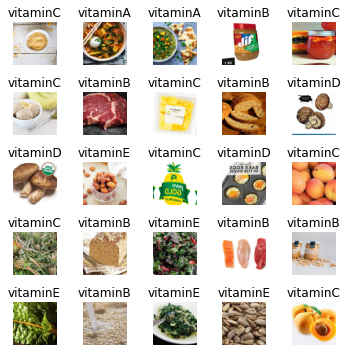

In [ ]:
data.show_batch(rows=5, figsize=(5,5))

<h3>Step -6</h3>

<h3>Training our model</h3>

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


<h5>Mounting our google drive to store the trained state and model </h5>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.makedirs("/content/drive/My Drive/model",exist_ok=True)

In [ ]:
my_dir="/content/drive/My Drive/model"

In [ ]:
path=""
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_folder( Path("vitamins_detection/vitamins_detection"), valid_pct=0.2, bs=64, size=224, ds_tfms=get_transforms())
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

In [ ]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,accuracy,time
0,1.337801,0.797961,0.745120,02:09
1,0.918353,0.621098,0.774679,02:03
2,0.671454,0.472525,0.829894,02:03
3,0.559545,0.448064,0.838260,02:03
4,0.490926,0.410088,0.851645,02:03
5,0.428699,0.385402,0.863915,02:03
6,0.353068,0.364745,0.866704,02:03
7,0.305631,0.361075,0.870608,02:04


In [ ]:
learn.save(my_dir+"/Stage-1")

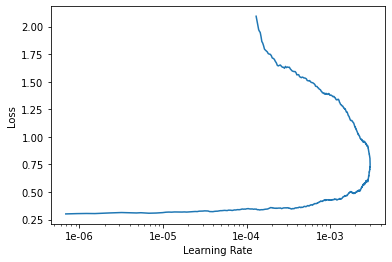

In [ ]:
learn.recorder.plot()

Now let's train our model a little bit more by unfreezing it : )

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.317408,0.356320,0.872839,02:46
1,0.287136,0.356609,0.871166,02:43


<h3>Step -7</h3>

<h3>Storing our trained state and model 

In [ ]:
learn.save(my_dir+"/Stage-1")

In [ ]:
learn.export(my_dir+"/export.pkl")

<h3>That's all for training and exporting our model now in the next notebook we will make predictions on our test data :)</h3> 